**Juan Camilo Serrano Correa**

**201621366**


###Perceptrón Básico

In [22]:
#graficas
import matplotlib.pyplot as plt
#numerico
import pandas as pd
import numpy as np
from numpy import exp,array,random,dot

###Inicio

 1. Definir estructura(Cuantas entradas) =>w
 2. Definir implicitamente el proceso del perceptron
 3. Funcion Train
 4. Funcion de inferencia 

In [9]:
#Definimos los hiperparametros
inputs = 3
output = 1
alpha = 0.2 #LR = Learning Rate (Tasa de Aprendizaje) 0<LR<1
epoch = 100# =época = numero de iteraciones (pases) que hace sobre la informacion en el TRAINING

#Con la datos obtenido de ir aumentando el valor de epoch, se puede observar como el error tienen a 0 a medida que aumentamos epoch 
#Despues el valor llega disminuir por debajo de cero, para despues tender a cero por el eje negativo
#y lo hace este mismo proceso mas rapido si aumentamos el valor de alpha.
#Los datos obtenidos evidencian la teoria abordada en clase

In [15]:
class NeuralNetwork:
  #Objetivi de __init__ inicializa el modelo de la neurona
  def __init__(self):
    #Inicializar la semilla del valor aleatorio para asignarlos como pesos sinápticos
    random.seed(1)

    #Vamos a crear la estructura del perceptron en forma matricial
    #Inicializar los pesos sinápticos aleatoriamente entre -1 y 1
    self.synaptic_weights = 2*random.random((inputs, 1))-1

  #Vamos a definir la funcion de activacion (sigmoide)
  def __sigmoid(self,x):
    return 1/(1+exp(-x))
  
  #Derivada de la funcion de activación
  def __sigmoid_derivative(self,x):
    return x * (1 - x)
  
  #Vamos a definir os pasos basicos del perceptron(THINK)
  #Pasar las entradas a travez del proceso básico del perceptrón
  def think (self, features):
    return self.__sigmoid(dot(features, self.synaptic_weights))
  
  def normalize(self,inference):
    if inference >= 0.5:
      return 1
    if inference < 0.5:
      return 0

  #Entrenamiento del Perceptrón (Train)
  def train(self, features, target, alpha, epoch):
    for iteration in range (epoch):
      #Pasarel conjunto de entrenamiento(Features) a travésdel proceso de la neurona
      output = self.think(features)
      #Vamos a calcular el error
      #Como la diferencia entre el valor del TARGET y el valor predicho(THINK)
      error = []
      error = target - output

      
      #Retropropagacion
      #Multiplicar el error por el valor de la entrada (me aseguro de cuantificar unicamente el error entres las entradas
      #Multiplico eso por el gradiente desendente de la funcion de activacion (con la derivada)
      #Nota: Las entradas con valor 0 estan desactivadas y no las tenemos en cuenta
      #Nota2; El GD filtray pondera el error repartiendolo entre los pesos activos.
      adjustment = dot(features.T, error * self.__sigmoid_derivative(output))
      
      #Ahora si ajustamos los pesos sinápticos
      self.synaptic_weights = self.synaptic_weights + (adjustment*alpha)
      return error

###Clase Principal

In [16]:
#Llamamos a un percpetrón
#Clase Principal
if __name__ == "__main__":
  #Inicialice (llame) a un perceptrón
  perceptron = NeuralNetwork()
  print ("Comprobación de Pesos sinaápticos (randoms)")
  print (perceptron.synaptic_weights)

  #contruir nuestro conjunto de entrenamiento 
  train_X = array([[0,0,1],[1,1,1],[1,0,1],[0,1,1]])#Features
  train_y  =  array([[0,1,1,0]]).T                  #Targets

  #Entrenar la red neuronal con las parámetros que ya dimos
  perceptron.train(train_X, train_y, alpha, epoch)
  
  print("Comprobacion de pesos sinapticos (ya entrenados)")
  print(perceptron.synaptic_weights)

  #vamos a comprobar el perceptron con una situacion desconocida
  test = array ( [0,0,0] )
  print ("Considerando nuevo caso: "+ str(test))

  #Ahora hacer la inferencia del perceptrón
  resultado = perceptron.think(test)
  print ("El perceptron dice que es (inferencia): "+ str(resultado))
  print ("El perceptron dice que es (normalizado): "+ str(perceptron.normalize(resultado)))


Comprobación de Pesos sinaápticos (randoms)
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Comprobacion de pesos sinapticos (ya entrenados)
[[-0.10871398]
 [ 0.45343158]
 [-0.96994455]]
Considerando nuevo caso: [0 0 0]
El perceptron dice que es (inferencia): [0.5]
El perceptron dice que es (normalizado): 1


**Tarea:** Agregue una grafica la cual permita ver la disminucion del error (o la cantidad de aprendizaje) vs el numero de epocas

###Grafica de Error vs epoch

In [12]:
DataPlot =  NeuralNetwork()
plot__X = []#Lista donde se almacenan las variables de error para graficar
list2 = [] 
for x in range(epoch):#Almacenamos en un array los datos a graficar
  lista = DataPlot.train(train_X, train_y, alpha, epoch)#entrenamos la neurona para obtener los datos a graficar
  suma_de_pesos = 0#Limpiamos los pesos del ciclo anterior
  for i in lista:#iteramos cada posicion de la variable lista
    suma_de_pesos  = suma_de_pesos + i #sumamos todos los 4 pesos a la variable lista
    
  

In [ ]:
DataPlot =  NeuralNetwork()
plot__X = []#Lista donde 2se almacenan las variables de error para graficar
for x in range(epoch):#Almacenamos en un array los datos a graficar
  lista = DataPlot.train(train_X, train_y, alpha, epoch)#entrenamos la neurona para obtener los datos a graficar
  suma_de_pesos = 0#Limpiamos los pesos del ciclo anterior
  for i in lista:#iteramos cada posicion de la variable lista
    suma_de_pesos  = suma_de_pesos + i #sumamos todos los 4 pesos a la variable lista
  plot__X = suma_de_pesos
  print(plot__X)#datos para realizar la grafica
  #Intentos fallidos de almacenar los datos en una sola variable  IGNORE LAS SIGUIENTES DOS LINEAS
  #plot__X = np.append(suma_de_pesos)
  #plot__X[x].append(suma_de_pesos)#Almacenamos el resultado

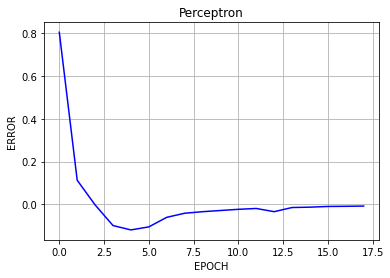

In [14]:
#Alguno valores de los datos optenidos al variar epoch, para graficar manualmente
xx=[0.8033,0.1128,-0.0024,-0.0987,-0.1191,-0.1050,-0.0604,-0.0413,-0.0341,-0.0285,-0.023,-0.0190,-0.0178-0.0162,-0.0146,-0.0129,-0.0096,-0.0089,-0.00787]
plt.xlabel('EPOCH')#Esta escala no es real
plt.ylabel('ERROR')
plt.title('Perceptron')
plt.grid(True)
plt.plot(xx,color='blue')
plt.show()